#### Overview of included populations for testing.

In [1]:
# Imports
import os

import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns

In [2]:
# Set root Dir for the project.
ROOT_DIR = "/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/"
RESULTS_DIR = ROOT_DIR + "StudyPopulation/"

# Dataset folder
PING_DATA = "/Volumes/T7/PING/TabularData/"
BCP_DATA = ROOT_DIR + "/BCP/"
BANDA_DATA = "/Volumes/T7/CCPM/BANDA/BANDARelease1.1/"
GESTE_DATA = "/Volumes/T7/CCPM/GESTE/"
ABCD_DATA = "/Volumes/T7/CCPM/ABCD/Release_5.1/abcd-data-release-5.1/"
MYRNA_DATA = "/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/"

# Create a directory for the results if it doesn't exist
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

In [3]:
# Fetch Harding font.
font_files = []
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Harding".lower() in fontpath.lower():
        font_files.append(fontpath)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Set Harding font.
plt.rcParams['font.family'] = 'Harding Text Web'

# Set the Set2 color palette as an iterable.
cmap = sns.color_palette("Set2", 8)

In [6]:
# Load up PING data
ping_df = pd.read_csv(f"{PING_DATA}/pdti01.txt", sep="\t")
with open(f"{ROOT_DIR}/PING/list_subs_PING.txt") as f:
    ping_subs = f.read().splitlines()

print(f"Number of subjects with complete dmri data: {len(ping_subs)}")

# Drop the first row, not needed.
ping_df = ping_df.drop(0)

# Fetch unique value for column image_description
#print(ping_df['image_description'].unique())

# Keep only subject with 'MR Diffusion' image.
#ping_df_dmri = ping_df[ping_df['image_description'] == "MR diffusion"]
#ping_df_b0 = ping_df[ping_df['image_description'] == "MR structural (B0 map)"]
#print("Number of subjects with dMRI data: ", ping_df_dmri.src_subject_id.unique().__len__())

# Create a new df containing only id, cohort, age, and sex.
ping_df_dmri = ping_df[["src_subject_id", "sex", "interview_age"]]
ping_df_dmri = ping_df_dmri.rename(columns={"src_subject_id": "subject_id", "interview_age": "age"})
ping_df_dmri["cohort"] = "PING"

# Append sub- before subject_id
ping_df_dmri["subject_id"] = "sub-" + ping_df_dmri["subject_id"]

# Filter subject to include only the one from subject list.
ping_df_dmri = ping_df_dmri[ping_df_dmri["subject_id"].isin(ping_subs)]
print(f"Number of subjects with complete dmri data:", ping_df_dmri.subject_id.unique().__len__())

# Get the list of matching subject
matching_subjects = ping_df_dmri.subject_id.unique()

# Fetch the missing one using set.
missing_subjects = set(ping_subs) - set(matching_subjects)
with open(RESULTS_DIR + "ping_missing_subjects_demo.txt", "w") as f:
    f.write("\n".join(missing_subjects))

# Transform age from months to years
ping_df_dmri["age"] = ping_df_dmri.age.apply(lambda x: int(x) / 12)

# Filter out subjects with age > 18
print("Number of subjects with age > 18: ", ping_df_dmri[ping_df_dmri["age"] > 18])
ping_df_dmri = ping_df_dmri[ping_df_dmri["age"] <= 18]
print("Number of subjects with dMRI data: ", ping_df_dmri.subject_id.unique().__len__())

# Extract the unique subject IDs but remove the 'sub-' prefix
ping_sub_list = list(ping_df_dmri["subject_id"].unique())
# Remove the 'sub-' prefix from each subject ID
ping_sub_list = [sub_id.replace("sub-", "") for sub_id in ping_sub_list]

# Fetch URLs to download the data by filtering the original dataframe
#ping_download = ping_df[ping_df['src_subject_id'].isin(ping_sub_list)]
#ping_download = ping_download[ping_download['image_description'].isin(["MR diffusion", "MR structural (T1)"])]
#ping_download = ping_download[["image_file"]]
#ping_download.to_csv(RESULTS_DIR + "ping_download.csv", index=False)

ping_df_dmri.drop_duplicates(inplace=True)
ping_df_dmri.to_csv(RESULTS_DIR + "ping_demographics.csv", index=False)

ping_df_dmri.head()

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_6799/247342752.py:2: DtypeWarning: Columns (0,1,2,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

Number of subjects with complete dmri data: 608
Number of subjects with complete dmri data: 608
Number of subjects with age > 18:      subject_id sex        age cohort
668  sub-P0790   F  18.083333   PING
943  sub-P1105   M  18.166667   PING
971  sub-P1137   F  18.166667   PING
Number of subjects with dMRI data:  605


,subject_id,sex,age,cohort
1,sub-P0007,F,16.333333,PING
2,sub-P0008,M,16.583333,PING
3,sub-P0009,M,13.250000,PING
4,sub-P0010,F,14.916667,PING
5,sub-P0011,M,16.500000,PING


In [7]:
# Load up BANDA data.
with open(f"{ROOT_DIR}/list_BANDA.txt") as f:
    banda_subjects = f.read().split()

# Remove the sub- prefix from the subject ID.
banda_subjects = [sub.replace("sub-", "") for sub in banda_subjects]
print("Number of subjects in BANDA: ", len(banda_subjects))

# Fetch demographics from BANDA data.
banda_df = pd.read_csv(f"{BANDA_DATA}/ndar_subject01.txt", sep="\t")

# Keep only subjects that are in the BANDA list.
banda_df = banda_df[banda_df['src_subject_id'].isin(banda_subjects)]
banda_df = banda_df[banda_df['visit'] ==  "T1"]

# Assert that the number of subjects in the BANDA list is the same as the number of subjects in the demographics file.
assert len(banda_subjects) == len(banda_df), "Number of subjects in BANDA list and demographics file do not match."

# Create a new df containing only id, cohort, age, sex.
banda_df = banda_df[['src_subject_id', 'sex', 'interview_age']]
banda_df = banda_df.rename(columns={'src_subject_id': 'subject_id', 'interview_age': 'age'})
banda_df['cohort'] = "BANDA"

# Append sub- before subject_id
banda_df['subject_id'] = "sub-" + banda_df['subject_id']

# Transfer age in months to years.
banda_df['age'] = banda_df.age.apply(lambda x: int(x) / 12)

banda_df.to_csv(RESULTS_DIR + "BANDA_demographics.csv", index=False)

banda_df.head()


Number of subjects in BANDA:  203


,subject_id,sex,age,cohort
1,sub-BANDA007,F,14.583333,BANDA
2,sub-BANDA008,M,14.833333,BANDA
3,sub-BANDA009,F,14.666667,BANDA
4,sub-BANDA010,M,14.000000,BANDA
5,sub-BANDA011,F,15.750000,BANDA


In [8]:
# Load up GESTE data.
with open(f"{ROOT_DIR}/list_GESTE.txt") as f:
    geste_subjects = f.read().split()

# Fetch demographics from GESTE data.
geste_df = pd.read_csv(f"{GESTE_DATA}/PopInfo.csv")

# Keep only subjects that are in the GESTE list.
geste_df = geste_df[geste_df['record_id'].isin(geste_subjects)]

# Assert that the number of subjects in the GESTE list is the same as the number of subjects in the demographics file.
assert len(geste_subjects) == len(geste_df), "Number of subjects in GESTE list and demographics file do not match."

# Create a new df containing only id, cohort, age, and sex.
geste_df = geste_df[['record_id', 'sexe_bb', 'child_age_assmt_auto']]
geste_df = geste_df.rename(columns={'record_id': 'subject_id', 'child_age_assmt_auto': 'age', 'sexe_bb': 'sex'})
geste_df['cohort'] = "GESTE"

print("Number of subjects in GESTE: ", geste_df.subject_id.unique().__len__())

# Replace 1 by M and 0 by F in sex column.
geste_df['sex'] = geste_df.sex.apply(lambda x: 'M' if x == 1 else 'F')
geste_df.to_csv(RESULTS_DIR + "GESTE_demographics.csv", index=False)
geste_df.head()

Number of subjects in GESTE:  199


,subject_id,sex,age,cohort
0,sub-1005,F,10.894018,GESTE
2,sub-1009,M,10.705330,GESTE
3,sub-1010,M,10.294530,GESTE
4,sub-1011,M,10.798419,GESTE
5,sub-1013,M,10.688789,GESTE


In [9]:
# Load up ABCD data.
abcd_subjects = pd.read_csv(f"{ROOT_DIR}/samplesheet_ABCD.csv")
abcd_subjects = abcd_subjects['subject'].to_list()

# Remove the sub- prefix from the subject ID.
abcd_subjects = [sub.replace("sub-", "") for sub in abcd_subjects]
print("Number of subjects in ABCD: ", len(abcd_subjects))
print(abcd_subjects)
# Fetch demographics from ABCD data.
abcd_age = pd.read_csv(f"{ABCD_DATA}/core/abcd-general/abcd_y_lt.csv")

# Filter for only baseline event.
abcd_age = abcd_age[abcd_age['eventname'] == "baseline_year_1_arm_1"]

# Keep only the columns we need.
abcd_age = abcd_age[['src_subject_id', 'interview_age']]

# Fetch demographics from ABCD data.
abcd_sex = pd.read_csv(f"{ABCD_DATA}/core/abcd-general/abcd_p_demo.csv")
abcd_sex = abcd_sex[abcd_sex['eventname'] == "baseline_year_1_arm_1"]

# Keep only the columns we need.
abcd_sex = abcd_sex[['src_subject_id', 'demo_sex_v2']]

# Merge the two dataframes.
abcd_df = pd.merge(abcd_sex, abcd_age, on='src_subject_id')

# Remove the _ in src_subject_id.
abcd_df['src_subject_id'] = abcd_df['src_subject_id'].str.replace("_", "")

# Keep only subjects that are in the ABCD list.
abcd_df = abcd_df[abcd_df['src_subject_id'].isin(abcd_subjects)]

# Create a new df containing only id, cohort, age, and sex.
abcd_df = abcd_df[['src_subject_id', 'demo_sex_v2', 'interview_age']]
abcd_df = abcd_df.rename(columns={'src_subject_id': 'subject_id', 'interview_age': 'age', 'demo_sex_v2': 'sex'})
abcd_df['cohort'] = "ABCD"

# Append sub- before subject_id
abcd_df['subject_id'] = "sub-" + abcd_df['subject_id']

# Transfer age in months to years.
abcd_df['age'] = abcd_df.age.apply(lambda x: int(x) / 12)

# Replace 1 by M and 2 by F
abcd_df['sex'] = abcd_df.sex.apply(lambda x: 'M' if x == 1 else 'F')

# Fetch only 300 subjects, but keep the same distribution.
abcd_df = abcd_df.sample(300, random_state=42)

print("Number of subjects in ABCD after sampling: ", abcd_df.subject_id.unique().__len__())

# Save the id likst to a txt file.
with open(RESULTS_DIR + "abcd_subjects.txt", "w") as f:
    for sub in abcd_df['subject_id']:
        f.write(f"{sub}\n")

abcd_df.to_csv(RESULTS_DIR + "abcd_demographics.csv", index=False)

abcd_df.head()

Number of subjects in ABCD:  9272
['NDARINV003RTV85', 'NDARINV005V6D2C', 'NDARINV00BD7VDC', 'NDARINV00CY2MDM', 'NDARINV00HEV6HB', 'NDARINV00LH735Y', 'NDARINV00LJVZK2', 'NDARINV00R4TXET', 'NDARINV00U4FTRU', 'NDARINV00UMK5VC', 'NDARINV00X2TBWJ', 'NDARINV010ZM3H9', 'NDARINV0182J779', 'NDARINV0191C80U', 'NDARINV01AJ15N9', 'NDARINV01ELX9L6', 'NDARINV01NAYMZH', 'NDARINV01RGTWD2', 'NDARINV01TXCDJN', 'NDARINV01Z8HAPV', 'NDARINV021403LF', 'NDARINV021N0FLH', 'NDARINV022ZVCT8', 'NDARINV028WCTG6', 'NDARINV029PWCFY', 'NDARINV02EBX0JJ', 'NDARINV02JXJUZG', 'NDARINV02RCED7D', 'NDARINV02UVMTY7', 'NDARINV02WP3TP6', 'NDARINV030X9ZNH', 'NDARINV0387TP8R', 'NDARINV03BDCNWM', 'NDARINV03CV8RDT', 'NDARINV03KMHMJJ', 'NDARINV03XVEBPM', 'NDARINV03YU08FA', 'NDARINV040B4TRC', 'NDARINV04CLBZAD', 'NDARINV04EUBGTM', 'NDARINV04GAB2AA', 'NDARINV04JY6730', 'NDARINV04P0G6LK', 'NDARINV04R9REGF', 'NDARINV04TRXUGL', 'NDARINV052HU3CU', 'NDARINV056V9RRJ', 'NDARINV059VLAHF', 'NDARINV05ATJ1V1', 'NDARINV05CA3VX5', 'NDARINV05LGG3G

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_6799/4019461430.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  abcd_age = pd.read_csv(f"{ABCD_DATA}/core/abcd-general/abcd_y_lt.csv")
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_6799/4019461430.py:19: DtypeWarning: Columns (274) have mixed types. Specify dtype option on import or set low_memory=False.
  abcd_sex = pd.read_csv(f"{ABCD_DATA}/core/abcd-general/abcd_p_demo.csv")


Number of subjects in ABCD after sampling:  300


,subject_id,sex,age,cohort
10982,sub-NDARINVXHKRJC1C,M,10.500000,ABCD
11362,sub-NDARINVYFT16CPZ,F,10.833333,ABCD
4049,sub-NDARINVAUGA1ZYM,F,9.750000,ABCD
3187,sub-NDARINV8GP2PFEE,F,10.916667,ABCD
7107,sub-NDARINVK22WXK72,M,9.750000,ABCD


In [10]:
# Load up MYRNA data.
with open(f"{ROOT_DIR}/list_MYRNA.txt") as f:
    myrna_subjects = f.read().split()
print("Number of subjects in MYRNA: ", len(myrna_subjects))

# Fetch demographics from MYRNA data.
myrna_df = pd.read_csv(f"{MYRNA_DATA}/MYRNA-demo.csv")

# Split into visits.
myrna_df_t1 = myrna_df[myrna_df['redcap_event_name'] == 'enrollment___visit_arm_1']
myrna_df_t2 = myrna_df[myrna_df['redcap_event_name'] == 'delivery_arm_1']
myrna_df_t3 = myrna_df[myrna_df['redcap_event_name'] == 'postnatal_4244wks_arm_1']

# Drop columns that contains only NaN values.
myrna_df_t1 = myrna_df_t1.dropna(axis=1, how='all')
myrna_df_t2 = myrna_df_t2.dropna(axis=1, how='all')
myrna_df_t3 = myrna_df_t3.dropna(axis=1, how='all')

# Merge the three dataframes on record_id.
myrna_df = pd.merge(myrna_df_t1, myrna_df_t2, on='record_id', how='outer')
myrna_df = pd.merge(myrna_df, myrna_df_t3, on='record_id', how='outer')

# Convert the nih_id_family column to string and add a leading 3 to the string.
myrna_df['nih_id_family'] = myrna_df['nih_id_family'].apply(lambda x: str('sub-3' + str(int(x))))

# Set the column to string type.
myrna_df['nih_id_family'] = myrna_df['nih_id_family'].astype(str)

# Keep only subjects that are in the MYRNA list.
myrna_df = myrna_df[myrna_df['nih_id_family'].isin(myrna_subjects)]

# Assert that the number of subjects in the MYRNA list is the same as the number of subjects in the demographics file.
assert len(myrna_subjects) == len(myrna_df), "Number of subjects in MYRNA list and demographics file do not match."

# Create a new df containing only id, sex, age
myrna_df = myrna_df[['nih_id_family', 'gender', 'babay_age_wks']]
myrna_df = myrna_df.rename(columns={'nih_id_family': 'subject_id', 'babay_age_wks': 'age', 
                                    'gender': 'sex'})
myrna_df['cohort'] = "MYRNA"

# Transfer age in weeks to years. Assuming birth at 40 weeks.
myrna_df['age'] = myrna_df.age.apply(lambda x: (x - 40) / 52)

# Replace 1 by M and 2 by F
myrna_df['sex'] = myrna_df.sex.apply(lambda x: 'M' if x == 1 else 'F')


myrna_df.to_csv(RESULTS_DIR + "MYRNA_demographics.csv", index=False)
myrna_df.head()

Number of subjects in MYRNA:  83


,subject_id,sex,age,cohort
0,sub-31489,M,0.082692,MYRNA
1,sub-31453,M,0.025000,MYRNA
2,sub-31516,F,0.063462,MYRNA
3,sub-31454,F,0.059615,MYRNA
4,sub-31459,M,0.065385,MYRNA


In [11]:
# Load up the BCP data.
# Load up PING data
bcp_df = pd.read_csv(f"{BCP_DATA}/image03.txt", sep="\t")

# Drop the first row, not needed.
bcp_df = bcp_df.drop(0)

# Keep only subject with 'MR Diffusion' image.
#bcp_df_dmri = bcp_df[bcp_df['scan_type'] == "MR diffusion"]
#bcp_df_b0 = bcp_df[bcp_df['scan_type'] == "multi-shell DTI"]

# Create a new df containing only id, cohort, age, and sex.
bcp_df_dmri = bcp_df[["src_subject_id", "sex", "interview_age"]]
bcp_df_dmri = bcp_df_dmri.rename(columns={"src_subject_id": "subject_id", "interview_age": "age"})
bcp_df_dmri["cohort"] = "BCP"

# Append sub- before subject_id
# If subject_id is < 6 character, prepend it with 0s to make it 6 characters long.
bcp_df_dmri["subject_id"] = "sub-" + bcp_df_dmri["subject_id"].astype(str).str.zfill(6)

# Create a session_id column with 'ses-' + f'{age}mo'.
bcp_df_dmri["session_id"] = bcp_df_dmri.apply(lambda row: f"ses-{int(row['age'])}mo", axis=1)

# Transform age from months to years
bcp_df_dmri["age"] = bcp_df_dmri.age.apply(lambda x: int(x) / 12)

# Drop redundant rows.
bcp_df_dmri = bcp_df_dmri.drop_duplicates()

# Filter out subjects with age > 5 years old.
bcp_df_dmri = bcp_df_dmri[bcp_df_dmri.age <= 6]

# remove either MNBCP or NCBCP from the subject_id string.
bcp_df_dmri["subject_id"] = bcp_df_dmri["subject_id"].str.replace("sub-MNBCP", "sub-").str.replace("sub-NCBCP", "sub-")

# Extract the unique subject IDs but remove the 'sub-' prefix
bcp_sub_list = list(bcp_df_dmri["subject_id"].unique())
# Remove the 'sub-' prefix from each subject ID
bcp_sub_list = [sub_id.replace("sub-", "") for sub_id in bcp_sub_list]

# Fetch URLs to download the data by filtering the original dataframe
bcp_download = bcp_df[bcp_df['src_subject_id'].isin(bcp_sub_list)]
bcp_download = bcp_download[bcp_download['scan_type'].isin(["MR diffusion", "multi-shell DTI", "MR structural (T1)"])]
bcp_download = bcp_download[["image_file"]]
bcp_download.to_csv(RESULTS_DIR + "bcp_download.csv", index=False)

bcp_df_dmri.to_csv(RESULTS_DIR + "bcp_demographics.csv", index=False)

# Drop the session_id column as it is not needed for the demographics.
bcp_df_dmri = bcp_df_dmri.drop(columns=["session_id"])

print("MIN: ", bcp_df_dmri.age.min())
print("MAX: ", bcp_df_dmri.age.max())
bcp_df_dmri.head()

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_6799/4289230233.py:3: DtypeWarning: Columns (0,1,2,4,6,8,10,12,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  bcp_df = pd.read_csv(f"{BCP_DATA}/image03.txt", sep="\t")


MIN:  0.0
MAX:  6.0


,subject_id,sex,age,cohort
1,sub-138813,M,0.750000,BCP
9,sub-198202,M,0.666667,BCP
40,sub-648807,M,1.750000,BCP
71,sub-493610,M,1.583333,BCP
101,sub-277066,F,0.333333,BCP


In [12]:
# Concatenate all the dataframes vertically.
df = pd.concat([ping_df_dmri, banda_df, geste_df, abcd_df, myrna_df, bcp_df_dmri])
df

,subject_id,sex,age,cohort
1,sub-P0007,F,16.333333,PING
2,sub-P0008,M,16.583333,PING
3,sub-P0009,M,13.250000,PING
4,sub-P0010,F,14.916667,PING
5,sub-P0011,M,16.500000,PING
...,...,...,...,...
32771,sub-738379,M,5.000000,BCP
32866,sub-597306,F,3.000000,BCP
33125,sub-514306,M,4.000000,BCP
34782,sub-495082,F,1.000000,BCP


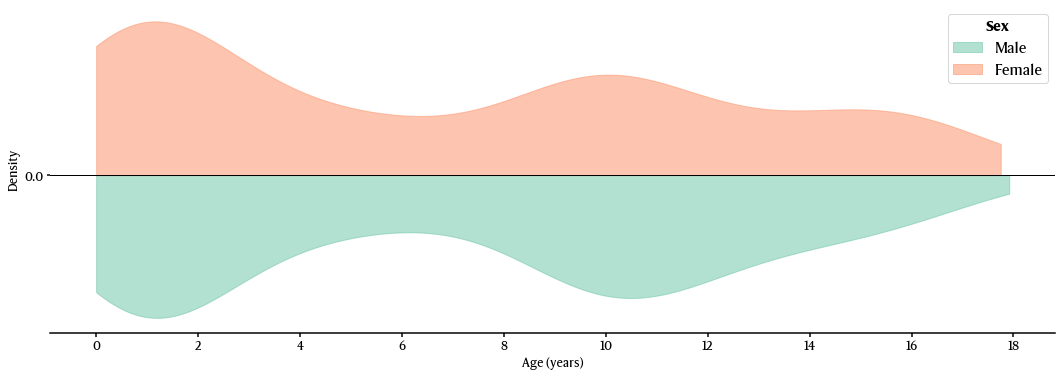

In [13]:
# Fetch age for males participants.
ages_male = df[df['sex'] == "M"]['age']
ages_female = df[df['sex'] == "F"]['age']

# Colors
colors = sns.color_palette("Set2", 2) 

# Compute KDE for males
kde_male = gaussian_kde(ages_male, bw_method=0.3)  # Adjust bandwidth
x_male = np.linspace(ages_male.min(), ages_male.max(), 1000)
y_male = kde_male(x_male)

# Compute KDE for females
kde_female = gaussian_kde(ages_female, bw_method=0.3)
x_female = np.linspace(ages_female.min(), ages_female.max(), 1000)
y_female = kde_female(x_female)

# Plot mirrored KDE
fig, ax = plt.subplots(figsize=(18, 6))

# Male KDE (mirrored)
ax.fill_between(x_male, -y_male, 0, color=colors[0], alpha=0.5, label="Male")

# Female KDE (positive)
ax.fill_between(x_female, 0, y_female, color=colors[1], alpha=0.5, label="Female")

# Customize the plot
ax.axhline(0, color="black", linewidth=1)  # Centerline
ax.set_xlabel("Age (years)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend()

# Change ticks for integer values
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

# Remove spines for aesthetics
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(1.5)

# Custom legend
ax.legend(loc="upper right", fontsize="x-large",
            markerscale=1.8, title="Sex",
            title_fontproperties={"weight": "bold", "size": 14})

# Make y-axis jump by 2
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

ax.tick_params(axis="both", labelsize=12)

plt.show()


/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_6799/3091949940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cohort", y="age", ax=ax, whis=3, palette="Set2",
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_6799/3091949940.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="cohort", y="age", ax=ax, palette="Set2", alpha=0.4,


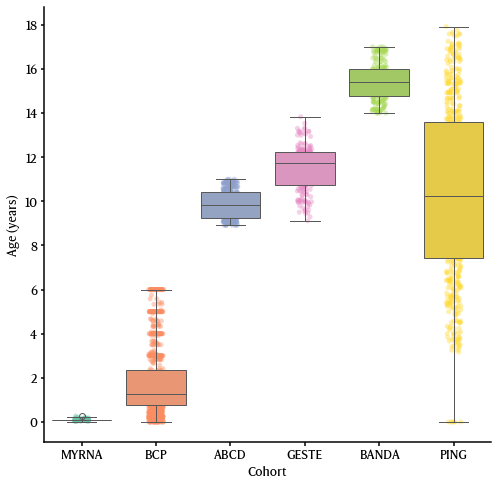

In [14]:
# Plot a boxplot of age by cohort.
fig, ax = plt.subplots(figsize=(8, 8))

sns.boxplot(data=df, x="cohort", y="age", ax=ax, whis=3, palette="Set2",
            order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"],
            zorder=2)
sns.stripplot(data=df, x="cohort", y="age", ax=ax, palette="Set2", alpha=0.4,
              order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"],
              zorder=1)

# Customize the plot
ax.set_xlabel("Cohort", fontsize=12)
ax.set_ylabel("Age (years)", fontsize=12)

# Remove spines for aesthetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)

# Change ticks for integer values
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

# Make y-axis jump by 2
ax.yaxis.set_major_locator(plt.MultipleLocator(2))

# Make text bigger
ax.tick_params(axis="both", labelsize=12)

plt.show()


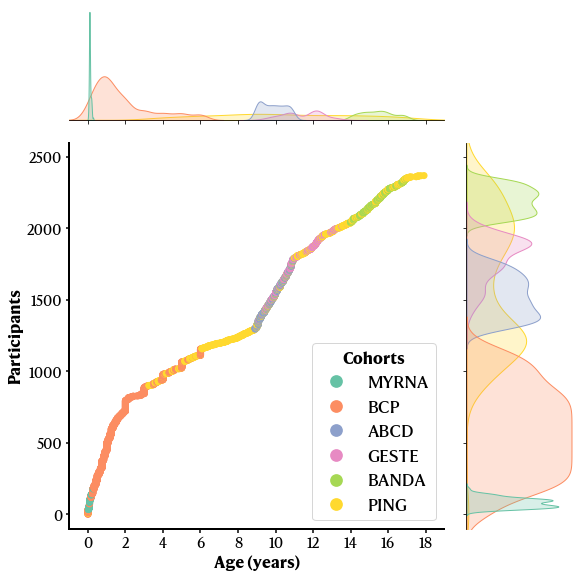

In [25]:
# Plot age as a scatterplot and y axis as individual subject.
# First reformatting: order subjects by age, then assign a unique value to each subject.
df.sort_values("age", ascending=True, inplace=True)

# Assign a unique value to each subject in a ascending order.
df["id"] = range(1, len(df) + 1)

# Plot the scatterplot
p = sns.jointplot(data=df, x="age", y="id", hue="cohort",
                  palette="Set2", s=50,
                  xlim=[-1, 19],
                  ylim=[-100, 2600],
                  hue_norm=[0, 1],
                  height=8,
                  ratio=3,
                  linewidth=0,
                  hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])

# Move the legend to the bottom right
ax = plt.gca()
ax.legend(loc="lower right", fontsize="xx-large",
            markerscale=1.8, title="Cohorts",
            title_fontproperties={"weight": "bold", "size": 16})

# Change look of the spines.
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)

# Change labels.
ax.set_ylabel("Participants", fontsize=16, fontdict={"weight": "bold"})
ax.set_xlabel("Age (years)", fontsize=16, fontdict={"weight": "bold"})

# Change xticks interval.
ax.xaxis.set_major_locator(plt.MultipleLocator(2))

# Change ticks for integer values
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

# Make text bigger
ax.tick_params(axis="both", labelsize=14)

plt.savefig(RESULTS_DIR + "age_scatterplot.png", dpi=900, bbox_inches='tight')

### **Stratifying the population into age intervals**

To perform the most appropriate reconstruction or filtering approach, there is
an important need to properly set some priors. Priors are highly dependent to
the age range in your population, to use the most appropriate priors, we need to
stratify the population and derive those optimal values.

In [25]:
# Set up intervals for age (using a dictionary), and create a table summary the number of subjects in each interval and the sex ratio. Using months for more granularity.
age_intervals = {
    "0-6 months": (0, 0.5), # UNCInfant
    "6-18 months": (0.5, 1.5), #UNCInfant
    "18-30 months": (1.5, 2.5), #UNCInfant
    "30-44 months": (2.5, 3.66666666666667), # MNIInfant
    "44-60 months": (3.6666666666666667, 5), # MNIInfant
    "5-8.5 years": (5, 8.5), # MNIPediatric
    "8.5-11 years": (8.5, 11), # MNIPediatric
    "11-14 years": (11, 14), # MNIPediatric
    "14-18 years": (14, 18) # MNIPediatric
}

# Create a new column with the age interval.
df["age_interval"] = pd.cut(df["age"], bins=[v[0] for v in age_intervals.values()] + [18],
                            labels=[k for k in age_intervals.keys()],
                            include_lowest=True)

In [26]:
# Compute summary table.
summary = df.groupby("age_interval").agg(
    total_participants=("subject_id", "count"),
    num_females=("sex", lambda x: (x == "F").sum()),
    num_males=("sex", lambda x: (x == "M").sum())
)

# Calculate sex ratio
summary["sex_ratio"] = summary["num_females"] / summary["num_males"].replace(0, pd.NA)

# Rename columns
summary.columns = ["Participants (count)", "Females (count)", "Males (count)", "Ratio (F/M)"]
summary.rename_axis("Age interval Groups", inplace=True)

# Save the summary table to a CSV file.
summary.to_csv(f"{RESULTS_DIR}/demographics_summary.csv")

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_85497/1535376245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby("age_interval").agg(
